<a href="https://colab.research.google.com/github/frankjinn/TensorFlowProjects/blob/main/01_Building_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###What is a regression problem?
* How much, How many -- They're quantity problems
* Many problems can be framed in a way to become regression problems 
* Looking at the relationship between the two variables to identify a trend

In [ ]:
import tensorflow as tf
print(tf.__version__) 

2.7.0


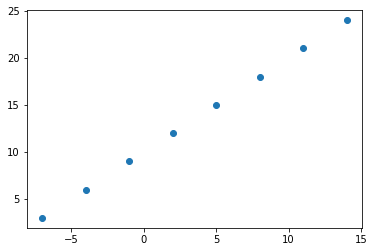

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize it
plt.scatter(X,y)

###Input and Output Shapes

In [ ]:
#Create a demo tensor for housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
#We see that this shape is wrong, we want 1 value, aka dimension 0 scalar 
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
#We want to use 1 value of x, to predict 1 value of y
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape
#We see it is shapeless, meaning dimension

((), ())

In [ ]:
#Turn numpy array into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape #remember X include ALL the sample data
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

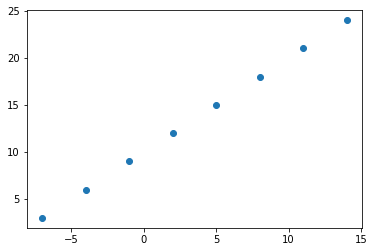

In [ ]:
plt.scatter(X,y)

##Steps in modelling with TensorFlow
1. Creating a model - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. Compiling a model - you might want to choose optimization function or perhaps change the learning rate of the optimization function.
3. Fitting a model - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
#Set random seed
tf.random.set_seed(42)

#1. Create a model using sequential API
model = tf.keras.Sequential([ #This step specifies the number of hiddel layers
  tf.keras.layers.Dense(1) #Layer 1: input 1 number, predict 1 number, number represents dimension of output
])

#Alternative using add function
#model = tf.keras.Sequential()
#model.add(tf.keras.layers.Dense(1))

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100


ValueError: ignored

In [ ]:
X = tf.expand_dims(X, axis=-1) # need this because model.fit() needs at least a 2-D tensor

This form represents that for each X scalar, we produce a Y value, the other form had x
in a list, which to model.fit() means that all X values produce a Y value

model.fit() needs at least a 2-D tensor because it represents 2 X coordinates, which is the 
minimum needed to fit a model

In [ ]:
#We try again
#Set random seed
tf.random.set_seed(42)

#1. Create a model using sequential API
model = tf.keras.Sequential([ #This step specifies the number of hiddel layers
  tf.keras.layers.Dense(1) #Layer 1: input 1 number, predict 1 number, number represents dimension of output
])
#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])
# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 746ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 18ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
#Check X and Y
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
#Try to make a prediction using out model
model.predict([17.0])
#Not very accurate

array([[12.716021]], dtype=float32)

###Improving Model
1. Improving model creation
  
  Add more layers, increase number of hidden neurons in layer, change the activation function of each layer...

2. Compiling a model
  
  Change the optimization function, or the **learning rate** of the optimization function

3. Fitting the model
  
  Here we might fit a model for more epochs (train for longer), or feed it more data


In [ ]:
#Set random seed
tf.random.set_seed(42)

#1. Create a model using sequential API
model = tf.keras.Sequential([ #This step specifies the number of hiddel layers
  tf.keras.layers.Dense(100, activation="relu"), #Extra layer with 100 neurons
  tf.keras.layers.Dense(1) #Only last layer: input 1 number, predict 1 number, number represents dimension of output
])
#2. Compile the model
#Adam is better, 0.093 seems to be close to optimal
#Generally, learning rate needs to be lower if neurons and layers increase
#We see here, that the model seems to be overfitting near the end, larger error then very small error
#This shows that the model is hitting its limits
model.compile(loss=tf.keras.losses.mse, #mse seems to work better than mae
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.094), 
              metrics = ["mse"])
# 3. Fit the model
model.fit(X, y, epochs=100) #Increased epochs

Epoch 1/100
1/1 [==============================] - 1s 835ms/step - loss: 187.8865 - mse: 187.8865
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 30.9326 - mse: 30.9326
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 102.6516 - mse: 102.6516
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 51.5537 - mse: 51.5537
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 17.4375 - mse: 17.4375
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 30.8529 - mse: 30.8529
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 32.7806 - mse: 32.7806
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 13.8224 - mse: 13.8224
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 18.3926 - mse: 18.3926
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 16.7160 - mse: 16.7160
Epoch 11/100
1/1 [==============================] 

In [ ]:
X, y 

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
model.predict([17.0])
#Very close prediction

array([[27.025763]], dtype=float32)

###Evaluating a Model: Visualize

In [ ]:
X = tf.range(-100, 100, 4)
y = X + 10
X, y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

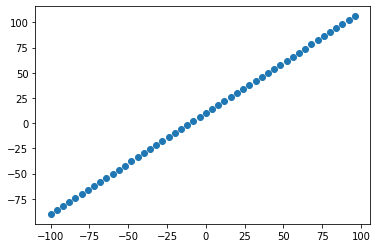

In [ ]:
plt.scatter(X,y)

###The 3 sets...
* Training set - the model learns from this set, which is 70-80% of the data
* Validation set - the model gets tuned on this data, which is 10-15% of the data
(This isn't necessary if there is not a lot of data samples)
* Test set - the model gets evaluated on this data of test

In [ ]:
#Split data into train and test sets
len(X) #is 50

X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

###Visualizing the data

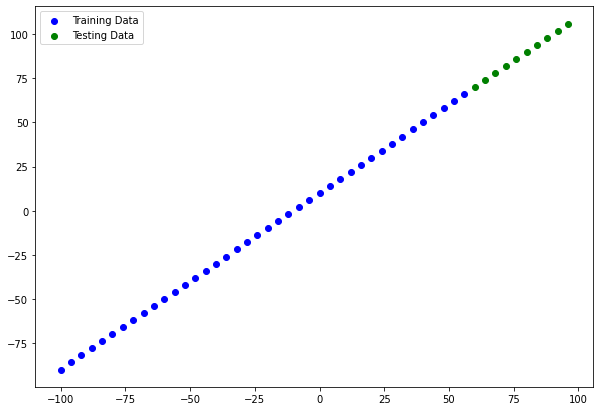

In [ ]:
plt.figure(figsize=(10,7))
#Plot training data
plt.scatter(X_train, y_train, c="b", label="Training Data")
#Plot test data
plt.scatter(X_test, y_test, c="g", label="Testing Data")
#Show legend
plt.legend()

In [ ]:
#Lets build a network using this data
#1. Create a model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = "mae")

In [ ]:
#Build a model which builds automatically by determining input shape
tf.random.set_seed(42)
#1. Create a model
model = tf.keras.Sequential([
      tf.keras.layers.Dense(10, input_shape=[1], name="input_layer_1"),
      tf.keras.layers.Dense(1, input_shape=[1], name="input_layer_2")
      #tf.keras.layers.Dense(3, name = "output_layer"),
],
      name = "model_1"
      #Dense means all neurons in this layer are connected to the next
      #input shape is 1, because we input a single value as a matrix
      #note the difference between simply 1 and [1], we input our values as [1]
      #This is why we needed to add the extra dimension to X
)

#2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = "mae")

In [ ]:
model.summary() #shows layers it contains, and number of 

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer_1 (Dense)       (None, 10)                20        
                                                                 
 input_layer_2 (Dense)       (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params: number of patterns model tries to learn

  Each neuron includes 1 weight and 1 bias, so the total param is 40 (40 things that affect the layer).
  
  For example, if you were scanning a image using RGB values with 20 neurons, the shape would be [3], so each neuron takes into account 3 weights (Red, Green, Blue), and a single bias. Total prams would be 20*3 + 20 = 80 parameters.

  Adding additional layers will take the # of neurons in the previous layer multiply it with # of neurons in this layer (20*3) then add the number of weight params (3), giving total params (63). This is because we are using Dense, so all neurons in the previous layer are connected with these neurons.

  Even though we only have 3 neurons in the second layer, the # of params is 63 because the weights of the 3 neurons are BASED on the 20 previous neurons, plus 3 weight params.

* Trainable parameters: parameters model can be updated
* Non-trainable params: parameters that cant be updated, typical for imported patterns that you want to reuse
* Output Shape: First value (in this case None) represents the Batch size, which is the number of samples processed before a change is made to layer. 

  Values after are the size of dimensions of input layer. In the image recognition example, if you had no additional shape besides [3], then it would be like scanning a single pixel for 3 RGB values. [2,3] would be like scanning a row of 2 pixels for 3 RGB values, and [2,2,3] would be scanning a 2x2 grid for 3 RGB values. Note that you are using the same neurons to scan all the pixels.

  Last value is the number of neurons in total.


>https://datascience.stackexchange.com/questions/39718/cant-understand-output-shape-of-a-dense-layer-keras


In [ ]:
#Let's fit out moedel to the training data
#Note that each time you run model.fit(), it runs and ADDITIONAL # of epoches, until you rebuild the model
#Also, note that since we specified the input shape, we do not have to expand X dimensions
#Otherwise we would need to do tf.expand_dims(X, axis = -1), which adds a dimension to the last axis
model.fit(X_train, y_train, epochs = 100, verbose = 0) #verbose = 0 silences progress

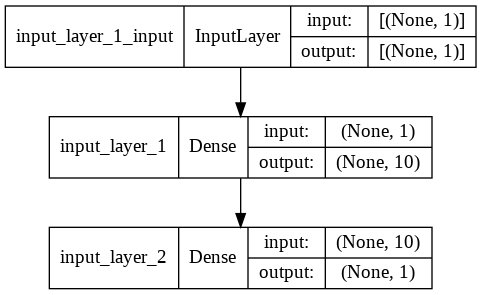

In [ ]:
#Another way to visualize model
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

###Visualizing our model's prediction

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll seet his in the form of y_test or y_true veruss y_pred (ground truth versus your model)

In [ ]:
# Make some predictions 
y_pred = model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

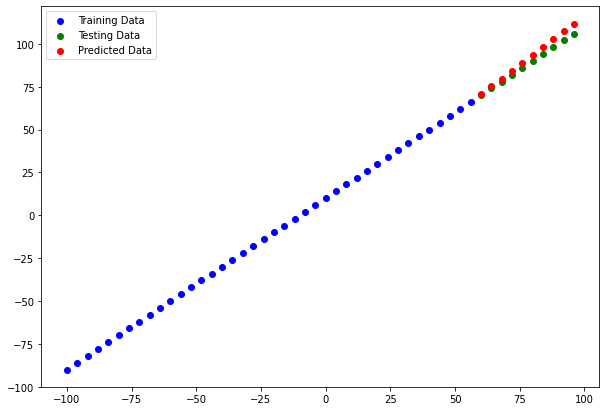

In [ ]:
plt.figure(figsize=(10,7))
#Plot training data
plt.scatter(X_train, y_train, c="b", label="Training Data")
#Plot test data
plt.scatter(X_test, y_test, c="g", label="Testing Data")
#Plot predicted data
plt.scatter(X_test, y_pred, c="r", label="Predicted Data")
#Show legend
plt.legend()

###Evaluating the model's prediction with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"

  Good starter metric for any regression problem


* MSE - mean square error, "square the average errors"

  When larger errors are more significant than smaller errors

* Huber
  Combination of MSE and MAE, less sensitive to outliers than MSE

In [ ]:
#Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 558ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [ ]:
#Calculate the mean absolute error
tf.keras.losses.MAE(y_true = y_test, y_pred = tf.transpose(y_pred)) #One needs to be transposed

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([3.1969407], dtype=float32)>

In [ ]:
#Calculate the mean squared error
tf.keras.losses.MSE(y_true = y_test, y_pred = tf.transpose(y_pred))

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([13.070143], dtype=float32)>

In [ ]:
#For convenience, make some functions
def mae(y_true, y_pred):
  return tf.keras.losses.MAE(y_true = y_test, y_pred = tf.squeeze(y_pred))
  #Alternative
  #tf.metrics.mean_absolute_error()

def mse(y_true, y_pred):
  return tf.keras.losses.MSE(y_true = y_test, y_pred = tf.squeeze(y_pred))

def plot_predictions(X_train = X_train, y_train = y_train, X_test = X_test, y_pred = y_pred):
  plt.figure(figsize=(10,7))
  #Plot training data
  plt.scatter(X_train, y_train, c="b", label="Training Data")
  #Plot test data
  plt.scatter(X_test, y_test, c="g", label="Testing Data")
  #Plot predicted data
  plt.scatter(X_test, y_pred, c="r", label="Predicted Data")
  #Show legend
  plt.legend()

###Running experiments to improve our model

1. Get more data - get more examples for your model to train on

2. Make model larger (using a more complex model) - more layers, more hidden units, train for longer

3. Train for longer - more model more of a chance to find patterns in the data

For this example we'll do 3 modelling experiements:

1. 'model_1' - same as the original, 1 layer, trained for 100 epochs

2. 'model_2' - 2 layers, trained for 100 epochs

3. 'model_3' - 2 layers, trained for 500 epochs

Note: we are changing 1 factor at a time

In [ ]:
#Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1])
])

# 2. Compile the model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs = 100, verbose = 0)

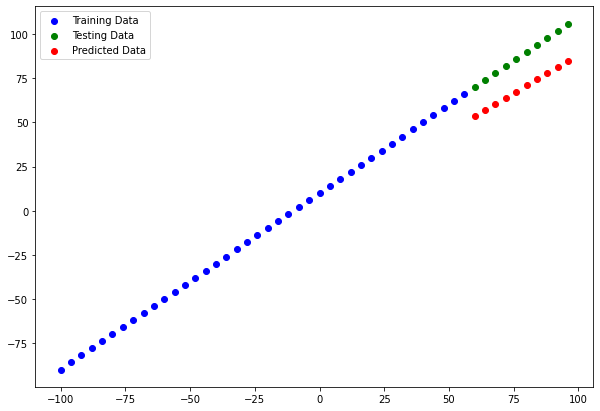

In [ ]:
#Visualize predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(y_pred = y_preds_1)

In [ ]:
#We need to squeeze or transpose the data
y_preds_1.shape, y_preds_1, tf.squeeze(y_preds_1)

((10, 1), array([[53.57109 ],
        [57.05633 ],
        [60.541573],
        [64.02681 ],
        [67.512054],
        [70.99729 ],
        [74.48254 ],
        [77.96777 ],
        [81.45301 ],
        [84.938255]], dtype=float32), <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([53.57109 , 57.05633 , 60.541573, 64.02681 , 67.512054, 70.99729 ,
        74.48254 , 77.96777 , 81.45301 , 84.938255], dtype=float32)>)

In [ ]:
#Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

In [ ]:
#Model_2: 2 Dense layers, for 100 epochs, 20 in layer 1, 1 in layer 2
#Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(20, input_shape = [1]),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mse"]) #This is changed too

# 3. Fit the model
model_2.fit(X_train, y_train, epochs = 100, verbose = 0)

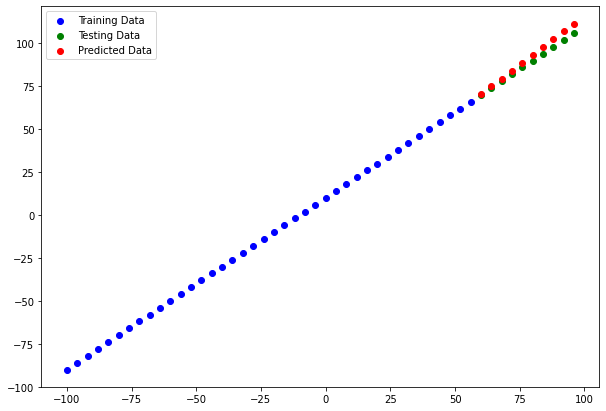

In [ ]:
#Visualize predictions for model_2
y_preds_2= model_2.predict(X_test)
plot_predictions(y_pred = y_preds_2)

In [ ]:
#Calculate model_1 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=2.9403756>,
 <tf.Tensor: shape=(), dtype=float32, numpy=11.373231>)

In [ ]:
#Model_3: 2 Dense layers, for 500 epochs, 20 in layer 1, 1 in layer 2
#Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(20, input_shape = [1]),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mse"]) #This is changed too

# 3. Fit the model
model_3.fit(X_train, y_train, epochs = 500, verbose = 0)

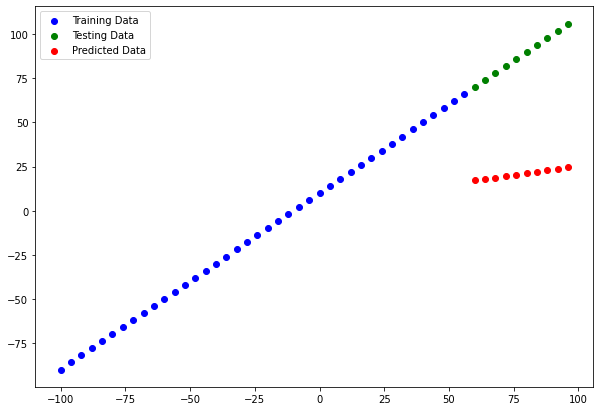

In [ ]:
#Visualize predictions for model_2
y_preds_3= model_3.predict(X_test)
plot_predictions(y_pred = y_preds_3)
#Model is overtrained

In [ ]:
#Calculate model_1 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.11937>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4587.4634>)

###Comparing the results of experiments

In [ ]:
#Compare using pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns = ["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,2.940376,11.373231
2,model_3,67.119370,4587.463379


In [ ]:
#Looks like model_2 performed the best
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 20)                40        
                                                                 
 dense_8 (Dense)             (None, 1)                 21        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


### Tracking experiements
Tracking experiements can be tedious
Some good resources are:
* TensorBoard - a component of the TensorFlow library to help modelling experiments
* Weights & Biases - a tool for tracking of all kinds of machine learning experiements

###Saving and exporting models

Saving models allows us to use them outside of google colab, like in a web or mobile app.

There are 2 formats:

* SavedModel
* HDF5

In [ ]:
#Save model in SavedModel 
model_2.save("Model_2")

INFO:tensorflow:Assets written to: Model_2/assets


In [ ]:
model_2.save("Model_2_HDF.h5")

####Loading in a saved model

In [ ]:
loaded_SavedModel_format = tf.keras.models.load_model("/content/Model_2")
loaded_SavedModel_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 20)                40        
                                                                 
 dense_8 (Dense)             (None, 1)                 21        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loaded_h5_model = tf.keras.models.load_model("/content/Model_2_HDF.h5")
loaded_h5_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 20)                40        
                                                                 
 dense_8 (Dense)             (None, 1)                 21        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Check if loaded .h5 model predictions matches model 2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

###Download a model (or any other file) from Google Colab

1. Go to "files" tab and right click on the file, and click download

2. Use code (see the cell below)

3. Save to Google Drive


In [ ]:
#Download file
from google.colab import files
files.download("/content/Model_2_HDF.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Save a file to Google Drive
!cp /content/Model_2_HDF.h5 /content/drive/MyDrive

In [ ]:
!ls /content/drive/MyDrive

 345d35658f.pdf    'Extra Curric.'
'Cal Card.pdf'	    I901_payment_confirmation_07202021.PDF
'Colab Notebooks'  'JIN- FRANK.pdf'
 Colab_Notebooks    Model_2_HDF.h5
 Courses	    Presentations
'Covid Pass'	    strength-training.pdf
 Documents


##A larger example

In [ ]:
#Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib as plt

In [ ]:
#Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#Perparing the data
#One-hot encode: Turns categorical data into numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
#Creating X and y values in pandas Dataframe
X = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot["charges"]
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
#Creating different sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size = 0.8)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
#Build a neural network
tf.random.set_seed(42)

#1. Create the model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = [11]),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

#3. Fit the model
insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8543.7441 - mae: 8543.7441
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7579.8794 - mae: 7579.8794
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7568.2817 - mae: 7568.2817
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7538.5620 - mae: 7538.5620
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7648.6987 - mae: 7648.6987
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7496.9604 - mae: 7496.9604
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7579.5347 - mae: 7579.5347
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7747.0220 - mae: 7747.0220
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7758.9058 - mae: 7758.9058
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7654.9463 - mae: 7654.9463

In [ ]:
insurance_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                120       
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Check results of insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7771.9043 - mae: 7771.9043


[7771.904296875, 7771.904296875]

#We try to improve this model

1. Increase learning time: 100 <= epochs < 500
3. Change to mse: returns nan
2. Add layer of neurons
3. Increase # of neurons
4. Change to Adam

In [ ]:
#Changed to Adam, and added new layer of 100
#Build a neural network
tf.random.set_seed(42)

#1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape = [11]),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
insurance_model_2.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mae"])

#3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs = 100, verbose = 1)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13092.5352 - mae: 13092.5352
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12923.8408 - mae: 12923.8408
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12570.8145 - mae: 12570.8145
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 11879.5010 - mae: 11879.5010
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10739.3789 - mae: 10739.3789
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9340.0273 - mae: 9340.0273
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8112.1543 - mae: 8112.1543
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7551.4512 - mae: 7551.4512
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7448.3208 - mae: 7448.3208
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7422.7476 - mae:

In [ ]:
#Check results of insurance model on the test data
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 5171.0493 - mae: 5171.0493


[5171.04931640625, 5171.04931640625]

In [ ]:
#Increase learning time
tf.random.set_seed(42)

#1. Create the model
insurance_model_3 = tf.keras.Sequential([
     tf.keras.layers.Dense(100, input_shape=[11]),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)                                    
])

#2. Compile the model
insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

#3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs = 200, verbose = 1)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 13092.5352 - mae: 13092.5352
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 12923.8408 - mae: 12923.8408
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12570.8145 - mae: 12570.8145
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 11879.5010 - mae: 11879.5010
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10739.3789 - mae: 10739.3789
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9340.0273 - mae: 9340.0273
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8112.1543 - mae: 8112.1543
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7551.4512 - mae: 7551.4512
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7448.3208 - mae: 7448.3208
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7422.7476 - mae:

In [ ]:
#Check results of insurance model on the test data
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3858.3181 - mae: 3858.3181


[3858.318115234375, 3858.318115234375]

Text(0.5, 0, 'epochs')

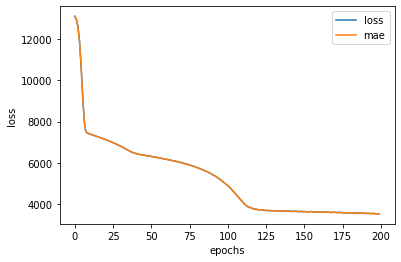

In [ ]:
#Plot history(also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.pyplot.ylabel("loss")
plt.pyplot.xlabel("epochs")

We can use something called EarlyStoppingCallback to figure out how long to train a model for

###Preprocessing Data (Normalization and standardization)

Normalization (usually preferred): We want a common scale for all the numerical values in each column without distorting the values. This will minimize outlier effect.

In [ ]:
X
#We see that bmi and age are on different scales

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


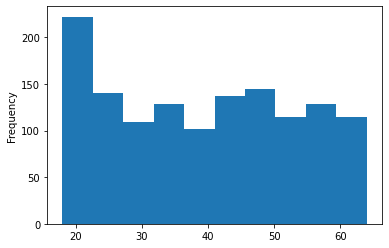

In [ ]:
X['age'].plot(kind="hist")

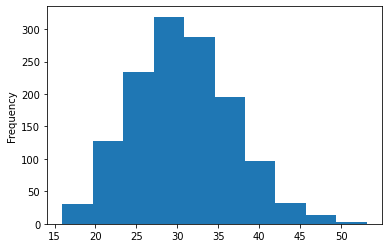

In [ ]:
X['bmi'].plot(kind="hist")

In [ ]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

#Read in data
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare out data, we can borrow a few calsses from scikit-Learn

In [ ]:
import sklearn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown = "ignore"), ["sex", "smoker", "region"])
)

#Create X & y
X = insurance.drop("charges", axis = 1)
y = insurance["charges"]

#Create sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Fit the column transformer to our training data only
ct.fit(X_train)

#Transform training and test data wtih normalization
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)
 

In [ ]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
#No longer a pandas DataFrame, now a list of arrays
X_train_normal.shape

(1070, 11)

In [ ]:
X_train.shape, X_train_normal.shape
#Some extra columns are created

((1070, 6), (1070, 11))

In [ ]:
#Building a neural network using normalized data
tf.random.set_seed(42)

#1. Creating the model
norm_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape = [11]),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compiling the model
norm_model.compile(loss = tf.keras.losses.mae,
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics = ["mae"]
                   )
#3. Fitting the model
history = norm_model.fit(X_train_normal, y_train, epochs = 100, verbose = 1)


Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13342.6475 - mae: 13342.6475
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11925.96

In [ ]:
norm_model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]